In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

%matplotlib widget

# KERNEL DENSITY ESTIMATION IN 2D

In [19]:
def kde2D(x, y, bandwidth, xbins=250j, ybins=250j, micro=False,**kwargs):
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    if micro == True:
        xx, yy = np.mgrid[x.min()-2.0:x.max()+2.0:xbins,
                          y.min()-2.0:y.max()+2.0:ybins]
    else:
        xx, yy = np.mgrid[x.min()-1.0:x.max()+1.0:xbins,
                          y.min()-1.0:y.max()+1.0:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

# DENSITY ESTIMATION OF THE MICRO-CANONICAL REPLICAS ENSEMBLE

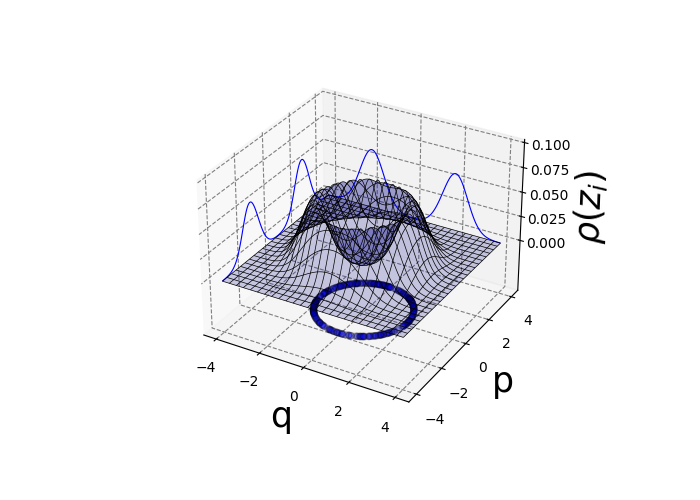

In [20]:
##MICROCANOCICAL ENSEMBLE PLOT VARIABLES
XPmicrocanonical = pd.read_csv("KBT2=E2/microcanonical_states.dat", names = ['X', 'P'])
qMC = XPmicrocanonical['X'].values[500000:512000]
pMC = XPmicrocanonical['P'].values[500000:512000]

Xm, Ym, Zm = kde2D(qMC, pMC, 0.55, micro=True)

fig = plt.figure(figsize = [7.0, 5.0])
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

## Plot a basic wireframe.
ax.plot_surface(Xm, Ym, Zm, rstride=10, cstride=10, alpha=0.2, linewidths=0.5, color='blue')
ax.plot_wireframe(Xm, Ym, Zm, rstride=10, cstride=10, color='black', linewidths=0.5)

from matplotlib import cm
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html
ax.contour(Xm, Ym, Zm, zdir='x', offset=-4.0, levels=0, colors='b', linewidths=0.8)
ax.contour(Xm, Ym, Zm, zdir='y', offset= 4.0, levels=0, colors='b', linewidths=0.8)

offset = -0.05
ax.scatter(qMC[:350], pMC[:350], offset, 'ko', alpha=0.2, edgecolor='black', linewidth=1.0, color='blue')

ax.set_zlim(offset,0.025)
ax.set_zticks(np.linspace(0,0.1,5))
#ax.view_init(27, -21)
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid(True)
ax.set_xlabel(r'q', fontsize=25)
ax.set_ylabel(r'p', fontsize=25)
ax.set_zlabel(r'$\rho(z_i)$', fontsize=25, labelpad=10.0)
fig.savefig('Pm.png', transparent=True, pad_inches=0.25)
#ax.view_init(elev=65, azim=-25)
plt.show()

# DENSITY ESTIMATION OF THE CANOCICAL REPLICAS ENSEMBLE

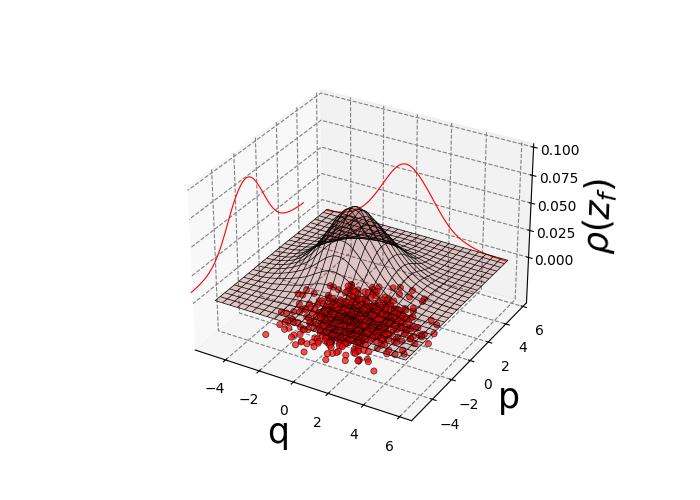

In [21]:
#CANONICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPcanonical = pd.read_csv("KBT2=E2/canonical_states.dat", names = ['X', 'P'])
qC = XPcanonical['X'].values[500000:501000]
pC = XPcanonical['P'].values[500000:501000]

Xc, Yc, Zc = kde2D(qC, pC, 0.75)
fig = plt.figure(figsize = [7.0, 5.0])
#ax  = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

## Plot a basic wireframe.
ax.plot_surface(Xc, Yc, Zc, rstride=10, cstride=10, alpha=0.2, linewidths=0.5, color= 'red')
ax.plot_wireframe(Xc, Yc, Zc, rstride=10, cstride=10, color='black', linewidths=0.5)
#ax.plot_surface(Xm, Ym, Zm, rstride=10, cstride=10, alpha=0.2, linewidths=0.5, color='blue')
#ax.plot_wireframe(Xm, Ym, Zm, rstride=10, cstride=10, color='black', linewidths=0.5)

# from matplotlib import cm
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html
ax.contour(Xc, Yc, Zc, zdir='x', offset=-6.5, levels=0, colors='r', linewidths=0.8)
ax.contour(Xc, Yc, Zc, zdir='y', offset= 5.5, levels=0, colors='r', linewidths=0.8)

offset = -0.04
#offset = 0.0
#ax.plot(qC, pC, offset, 'ko', ms=3, alpha=0.5, color='red', linewidth=1.0)
ax.scatter(qC[:750], pC[:750], offset, 'ko', alpha=0.7, edgecolor='black', linewidth=0.5, color='red')
#ax.scatter(qMC, pMC, offset, 'ko', alpha=0.2, edgecolor='black', linewidth=1.0, color='blue')

ax.set_zlim(offset, 0.025)
ax.set_zticks(np.linspace(0.0, 0.1, 5))
#ax.view_init(27, -21)
plt.grid(True)
ax.set_xlabel(r'q', fontsize=25)
ax.set_ylabel(r'p', fontsize=25)
ax.set_zlabel(r'$\rho(z_f)$', fontsize=25, labelpad=10.0)
fig.savefig('Pc.png', transparent=True, pad_inches=0.25)
#bbox_inches='tight'
#plt.xticks(rotation=90)
plt.show()

# MICROCANONICAL AND CANONICAL SAMPLE STATES

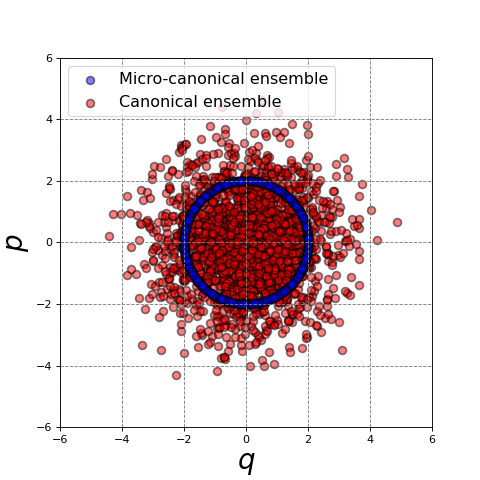

In [16]:
plt.figure(figsize=(6, 6), dpi=80)
#plt.grid(True)

#CANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPcanonical = pd.read_csv("KBT2=E2/canonical_states.dat", names = ['X', 'P'])
qC = XPcanonical['X'].values[500000:502000]
pC = XPcanonical['P'].values[500000:502000]

#MICROCANOCICAL REPLICAS ENSEMBLE PLOT VARIABLES
XPmicrocanonical = pd.read_csv("KBT2=E2/microcanonical_states.dat", names = ['X', 'P'])
qMC = XPmicrocanonical['X'].values[:1000]
pMC = XPmicrocanonical['P'].values[:1000]

plt.scatter( qC,  pC, s=50, alpha=0.5, edgecolor='black', linewidth =1.5, color='red',  label = r'Canonical ensemble')
plt.scatter(qMC, pMC, s=50, alpha=0.5, edgecolor='black', linewidth =1.5, color='blue', label = r'Micro-canonical ensemble')

#plt.plot(qTraj, pTraj, '-0', color='black', linewidth=2.0)
#plt.title( r'$Phase Space$')

plt.ylim(-6.0, 6.0)
plt.xlim(-6.0, 6.0)

plt.xlabel(r'$q$', fontsize=25)
plt.ylabel(r'$p$', fontsize=25)

plt.rc('grid', linestyle="--", color='grey')
plt.grid(True)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = 'x-large', loc='upper left')

plt.savefig('CM.png')
plt.show()

# MEAN ENERGY OVER TIME

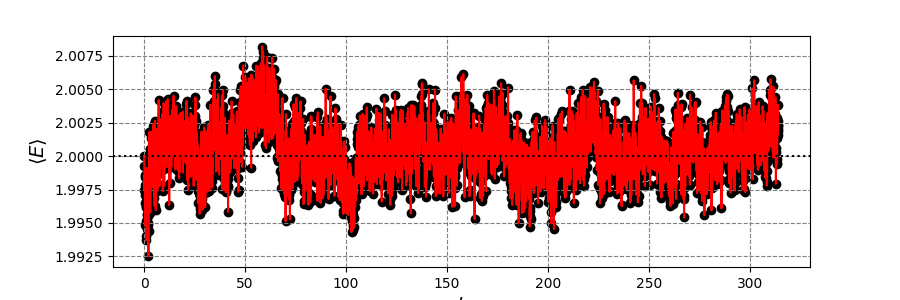

In [17]:
meanE_states = pd.read_csv("KBT2=E2/mean_energy.dat", names = ['t', 'E'])
fig, a = plt.subplots(figsize=(9, 3))
plt.plot(meanE_states.t.values, meanE_states.E.values, color="red", label="$Linear \quad Fit$")
plt.scatter(meanE_states.t.values, meanE_states.E.values, color="black")
plt.axhline(y=2.0, ls='dotted', color='black')
a.set_xlabel(r'$t$', fontsize=14)
a.set_ylabel(r'$\left< E \right> $', fontsize=14)
plt.grid(True)